<a href="https://colab.research.google.com/github/isaacisl/Machine-Learning/blob/main/Student_Perfomance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prever a variável alvo: Perfomance index.


In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [11]:
df = pd.read_csv('/content/Student_Performance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [12]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [13]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [14]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

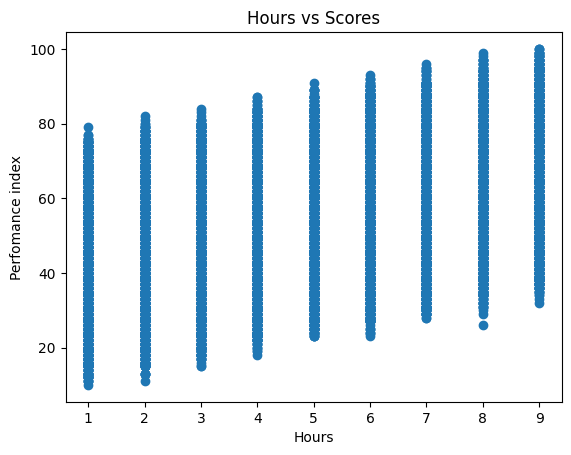

In [46]:
plt.scatter(df['Hours Studied'], df['Performance Index'])
plt.xlabel('Hours')
plt.ylabel('Perfomance index')
plt.title('Hours vs Scores')
plt.show()

In [51]:
X = df[['Hours Studied', 'Sleep Hours',]]
y = df['Performance Index']

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = LinearRegression()
modelo.fit(X_train, y_train)



LinearRegression()

In [52]:

y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [53]:
# Coeficientes das variaveis

coefeicientes = modelo.coef_
intercepto = modelo.intercept_
print(coefeicientes)
print(intercepto)

[2.74242615 0.80665157]
35.84713741935686


In [50]:
print(f"RMSE de treinamento: {rmse_train}")
print(f"RMSE de teste: {rmse_test}")
print(f"R^2 de treinamento: {r2_train}")
print(f"R^2 de teste: {r2_test}")

RMSE de treinamento: 17.870484428840733
RMSE de teste: 17.773768285028083
R^2 de treinamento: 0.13824328087305293
R^2 de teste: 0.14312448515593612


## Modelo fraco, proximo passo: tentar regressão polimonial